# Aprendizado Supervisionado
## Marcelo Nascimento da Silva - 22204025-5

Em 15 de abril de 1912, o maior transatlântico já construído colidiu com um iceberg durante sua viagem inaugural. Quando o Titanic afundou, ele matou 1502 dos 2224 passageiros e tripulantes. Essa tragédia sensacional chocou a comunidade internacional e levou a melhores regulamentações de segurança para navios. Uma das razões pelas quais o naufrágio resultou em tantas perdas de vidas foi a falta de botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse envolvido na sobrevivência ao naufrágio, que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros. Com isso, despertou-se a curiosidade de analisar as probabilidades presentes no dataset composto por informações se sobreviveu, classe, nome, sexo, idade, irmãos/cônjuges a bordo, pais/filhos a bordo e tarifa.

- Link de Download do dataset: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [215]:
#carregar os dados
data = pd.read_csv("titanic.csv")

In [216]:
print(data.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


Prever a sobrevivencia dos passageiros do Titanic a partir do modelo KNN

- Sem Grid Search

In [217]:
X = pd.get_dummies(data.drop(['Survived', 'Name'], axis=1), columns=['Sex'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do k-NN no conjunto de teste:", accuracy)

Acurácia do k-NN no conjunto de teste: 0.6910112359550562


- Com Grid Search

In [218]:
X = pd.get_dummies(data.drop(['Survived', 'Name'], axis=1), columns=['Sex'])
y = data['Survived']

#dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#parâmetros para o Grid Search
parameters = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

#criar o objeto Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='accuracy')

#treinar o Grid Search
grid_search.fit(X_train, y_train)

#melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:",grid_search.best_params_)
print()

#avaliar o modelo no conjunto de teste
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do k-nn no conjunto de teste:", accuracy)

Melhores hiperparâmetros: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}

Acurácia do k-nn no conjunto de teste: 0.7303370786516854


In [219]:
#formato das matrizes de treino e teste
print('Formato das matrizes de treino:', X_train.shape, '  Formato das matrizes de teste:', X_train.shape)

Formato das matrizes de treino: (709, 7)   Formato das matrizes de teste: (709, 7)


In [220]:
X_train.dtypes

Pclass                       int64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
Sex_female                    bool
Sex_male                      bool
dtype: object

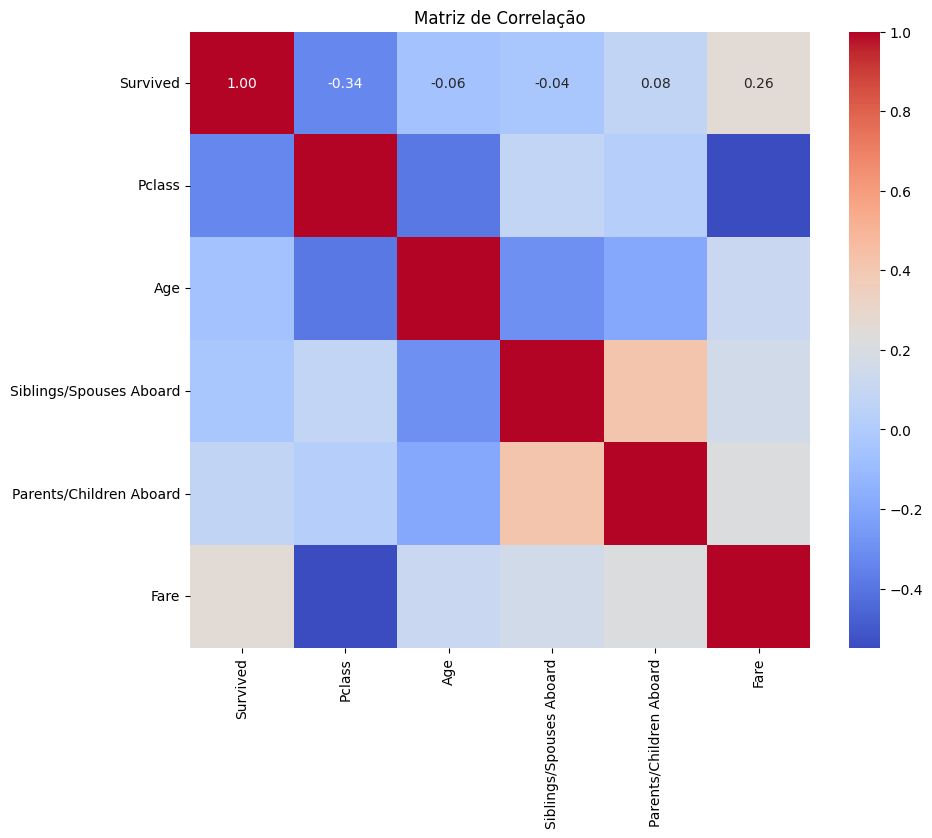

In [221]:
data_encoded = pd.get_dummies(data, columns=['Sex'])

#calculando a correlação
X_train_corr = data_encoded[['Survived', 'Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(X_train_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


Agrupa os passageiros do Titanic com base em suas características de idade e tarifa paga

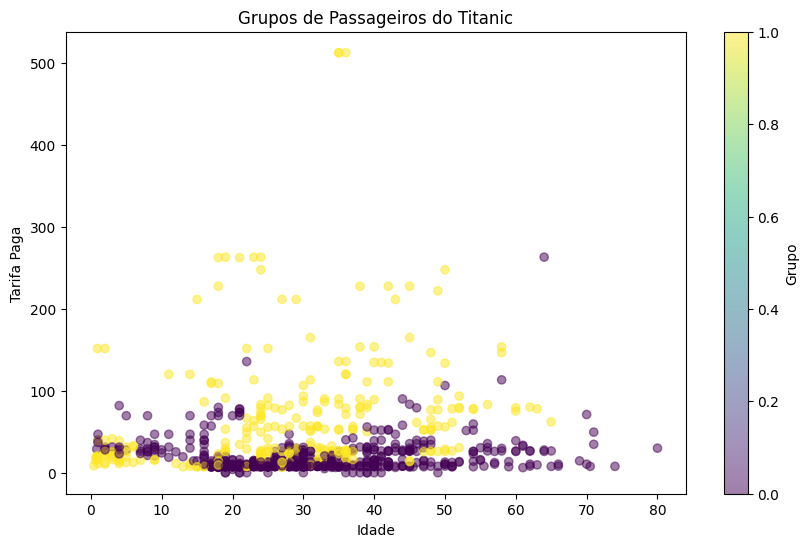

In [222]:
#características 'Age' e 'Fare'
X = data[['Age', 'Fare']]

#preencher valores ausentes com a média
X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, data['Survived'])

#prever os grupos dos passageiros
groups = knn.predict(X_scaled)

#gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['Fare'], c=groups, cmap='viridis', alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Tarifa Paga')
plt.title('Grupos de Passageiros do Titanic')
plt.colorbar(label='Grupo')
plt.show()


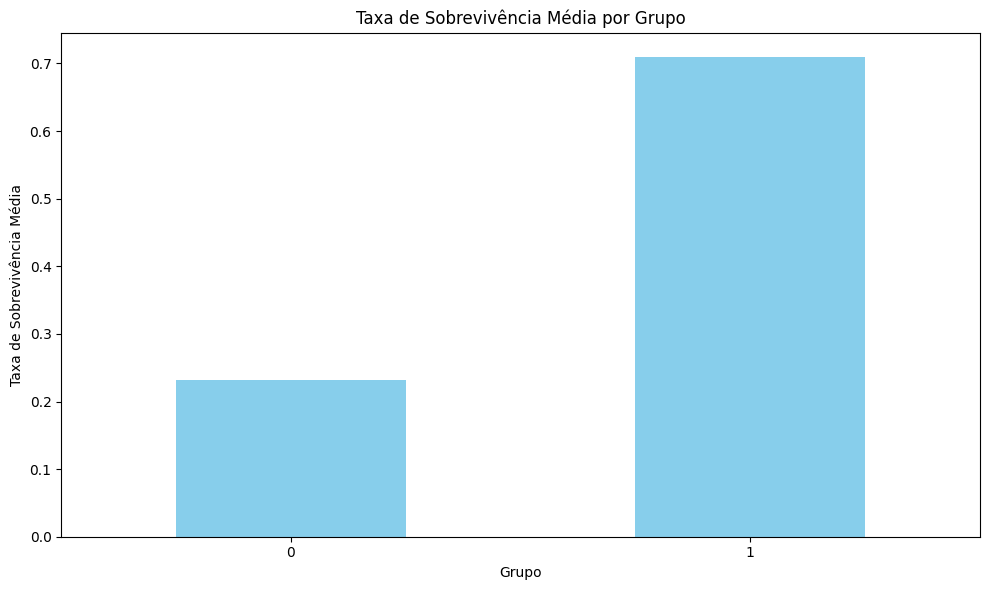

In [223]:
data['Group'] = groups

#taxa de sobrevivência média de cada grupo
survival_rates = data.groupby('Group')['Survived'].mean()

plt.figure(figsize=(10, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Sobrevivência Média')
plt.title('Taxa de Sobrevivência Média por Grupo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Prever a sobrevivencia dos passageiros do Titanic a partir do modelo Decision Tree

- Sem Grid Search

In [224]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

X = data.drop(columns=['Survived', 'Name']) 
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2))  
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8033707865168539


- Com Grid Search

In [225]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

#dados conjuntos de treinamento e teste
X = data.drop(columns=['Survived', 'Name']) 
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('dt', DecisionTreeClassifier())  
])

parameters = {
    'dt__criterion': ['gini', 'entropy'],  
    'dt__max_depth': [None, 5, 10, 15],  
    'dt__min_samples_split': [2, 5, 10],  
    'dt__min_samples_leaf': [1, 2, 4]  
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy') 

grid_search.fit(X_train, y_train)

#melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)
print()

#avaliar o modelo no conjunto de teste
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Melhores hiperparâmetros: {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 10}

Acurácia: 0.8146067415730337


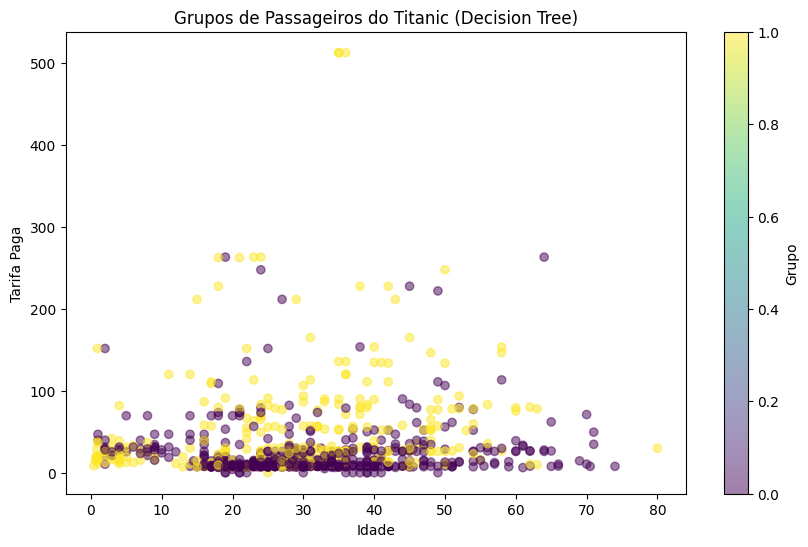

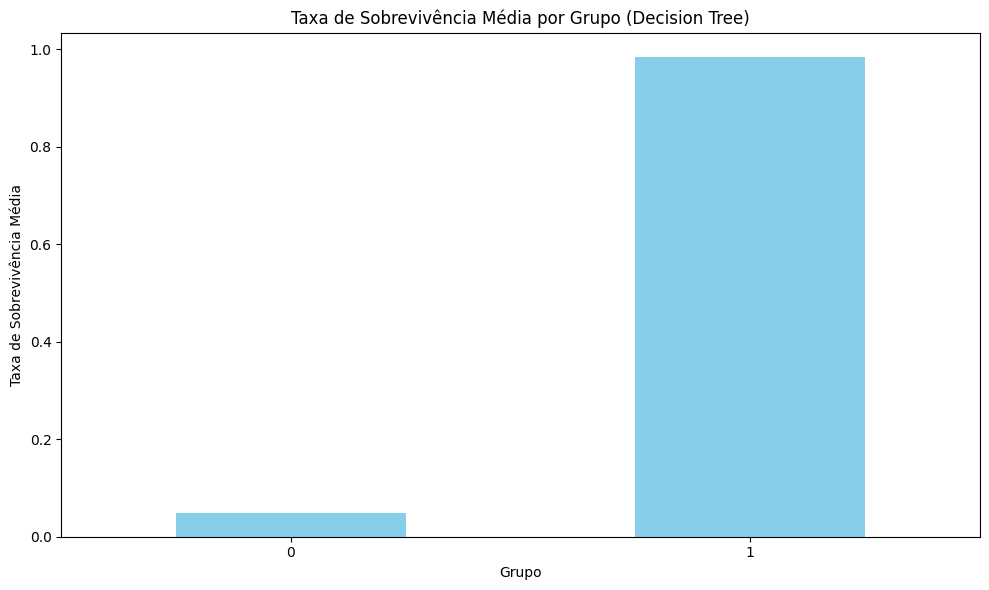

In [226]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_scaled, data['Survived'])

#prever os grupos dos passageiros
groups = decision_tree.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['Fare'], c=groups, cmap='viridis', alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Tarifa Paga')
plt.title('Grupos de Passageiros do Titanic (Decision Tree)')
plt.colorbar(label='Grupo')
plt.show()

data['Group'] = groups

#taxa de sobrevivência média de cada grupo
survival_rates = data.groupby('Group')['Survived'].mean()

plt.figure(figsize=(10, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Sobrevivência Média')
plt.title('Taxa de Sobrevivência Média por Grupo (Decision Tree)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Prever a sobrevivencia dos passageiros do Titanic a partir do modelo Naive Bayes

In [227]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

X = data.drop(columns=['Survived', 'Name']) 
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('nb', GaussianNB())  #classificador Naive Bayes
])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 0.9550561797752809


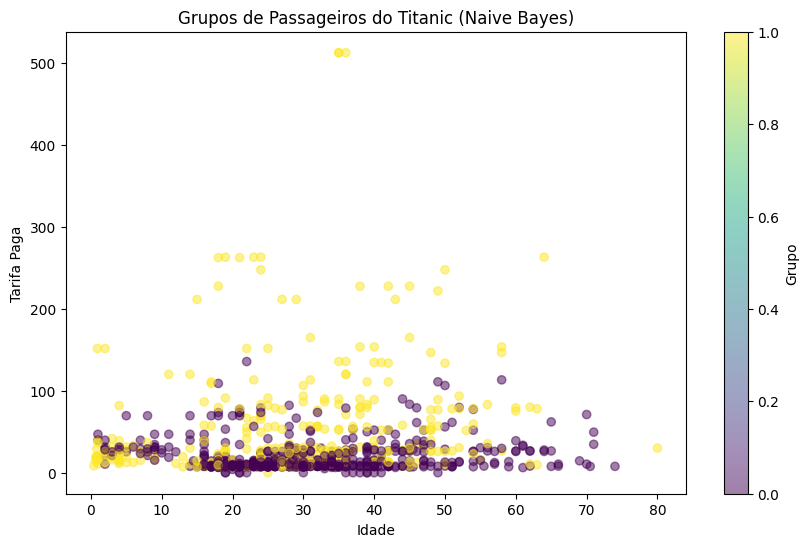

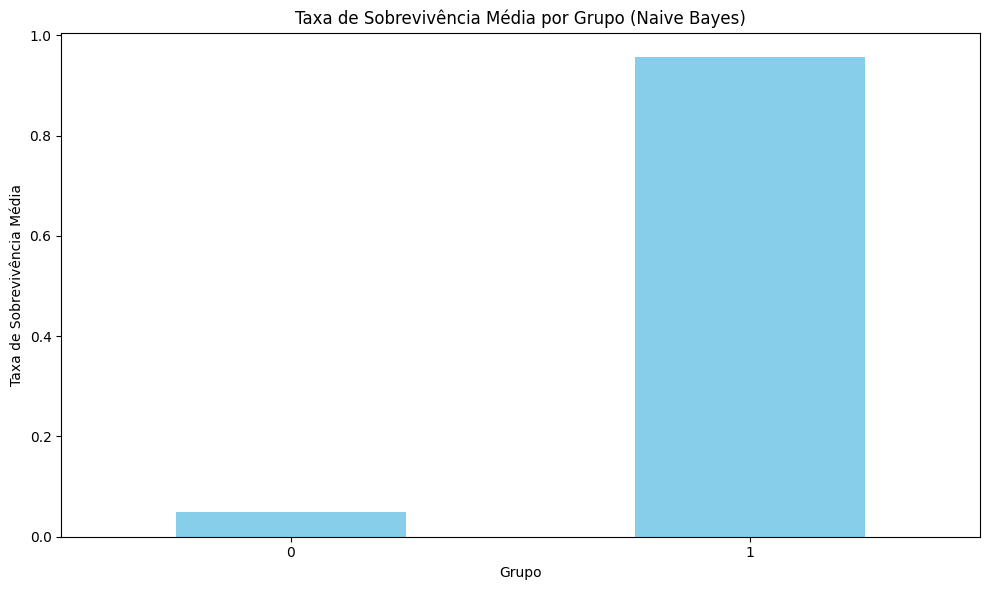

In [228]:
naive_bayes = GaussianNB()
naive_bayes.fit(X, data['Survived'])

groups = naive_bayes.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['Fare'], c=groups, cmap='viridis', alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Tarifa Paga')
plt.title('Grupos de Passageiros do Titanic (Naive Bayes)')
plt.colorbar(label='Grupo')
plt.show()

data['Group'] = groups

#taxa de sobrevivência média de cada grupo
survival_rates = data.groupby('Group')['Survived'].mean()

plt.figure(figsize=(10, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Sobrevivência Média')
plt.title('Taxa de Sobrevivência Média por Grupo (Naive Bayes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Segunda parte

## T2 - Aprendizado Supervisionado

Prever a sobrevivencia dos passageiros do Titanic a partir do modelo Random Forest

Acurácia: 94.38%


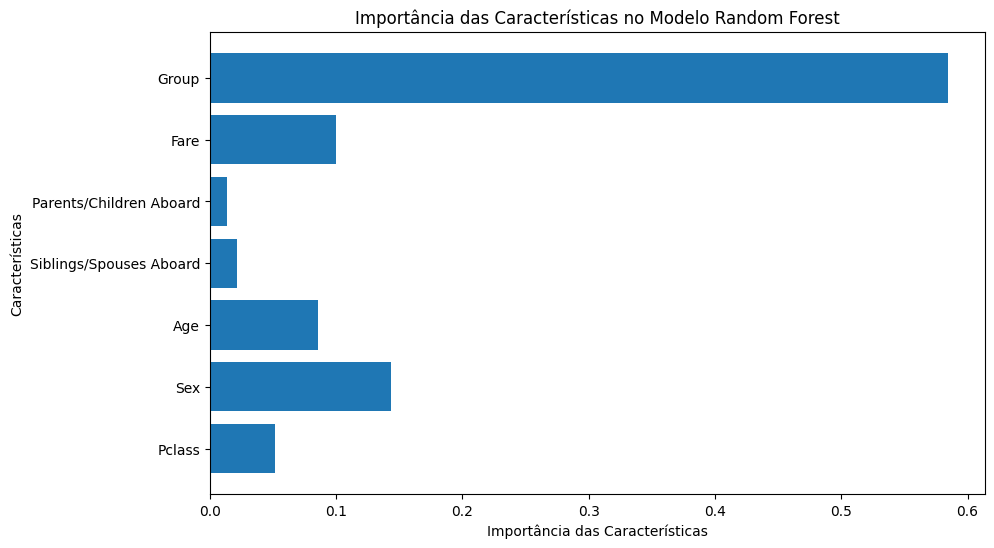

In [229]:
# removendo colunas irrelevantes
data = data.drop(['Name'], axis=1)

# cuidar dos valores ausentes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# variáveis categóricas
labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])

# separando os dados em características (X) e alvo (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# treino do modelo
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

# importância das características
model = pipeline.named_steps['classifier']
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importância das Características')
plt.ylabel('Características')
plt.title('Importância das Características no Modelo Random Forest')
plt.show()

In [230]:
# relatório de classificação
report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       111
           1       0.91      0.94      0.93        67

    accuracy                           0.94       178
   macro avg       0.94      0.94      0.94       178
weighted avg       0.94      0.94      0.94       178



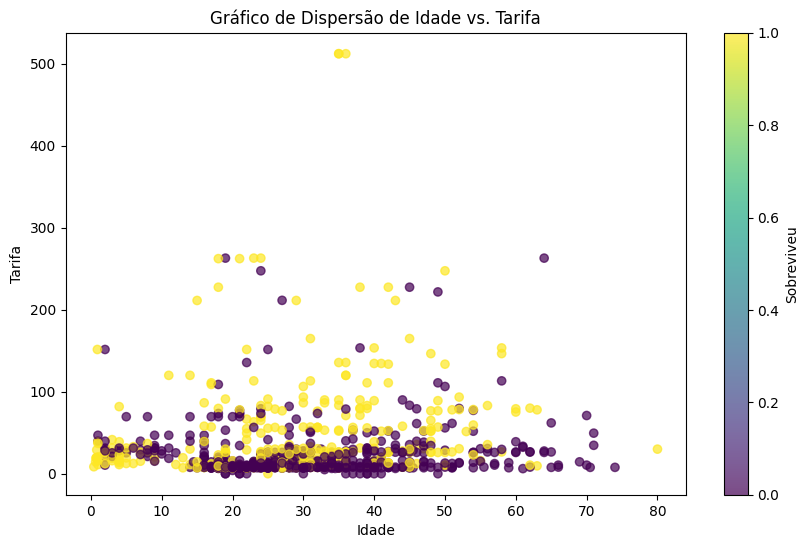

In [231]:
# gráfico de dispersão randon florest 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Age'], data['Fare'], c=data['Survived'], cmap='viridis', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.title('Gráfico de Dispersão de Idade vs. Tarifa')
plt.colorbar(scatter, label='Sobreviveu')
plt.show()

Prever a sobrevivencia dos passageiros do Titanic a partir do modelo Gradient Boosting

Acurácia: 0.96


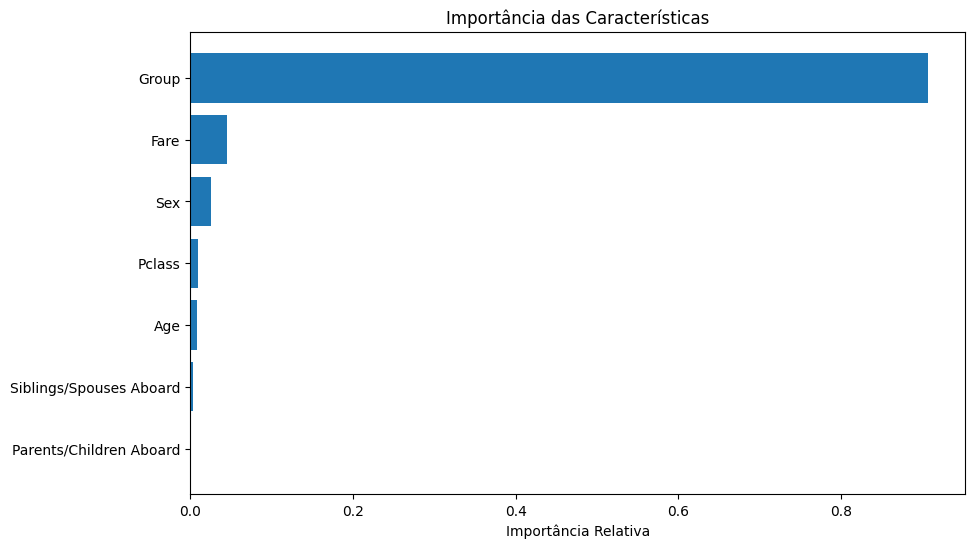

In [232]:
# variáveis categóricas (Sex)
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# cuidar de valores nulos (Age e Fare)
data['Age'].fillna(data['Age'].median())
data['Fare'].fillna(data['Fare'].median())

# separar os recursos e a variável alvo
X = data.drop(columns=['Survived'])
y = data['Survived']

# separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# treino do modelo Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# desempenho
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Importância das Características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importância Relativa')
plt.show()

In [233]:
print('Relatório de Classificação:')
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       111
           1       0.95      0.94      0.95        67

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



com gridSearch

In [234]:
# modelo
model = GradientBoostingClassifier()

# definindo hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# melhor estimador encontrado pelo GridSearchCV
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\nasci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Acurácia: 0.96


In [235]:
report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       111
           1       0.97      0.93      0.95        67

    accuracy                           0.96       178
   macro avg       0.96      0.95      0.96       178
weighted avg       0.96      0.96      0.96       178



In [236]:
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

Melhores hiperparâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


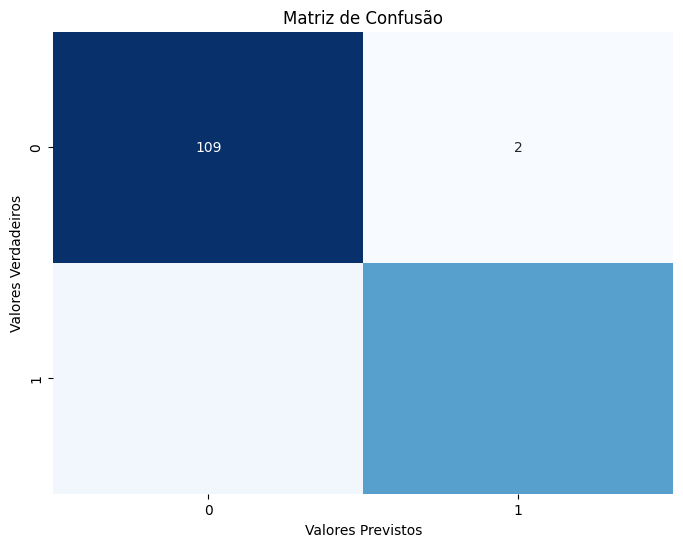

In [237]:
# previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# cria matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

Prever a sobrevivencia dos passageiros do Titanic a partir do modelo Multi Layer Perceptron

In [238]:
# colunas relevantes
selected_columns = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Survived']
data = data[selected_columns]

# converter variáveis categóricas em numéricas (Sex)
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# cuidar valores faltantes (NaN) se houver
data = data.dropna()  # descartando linhas com valores faltantes

# features e target
X = data.drop('Survived', axis=1)
y = data['Survived']

# dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# treinar o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.79


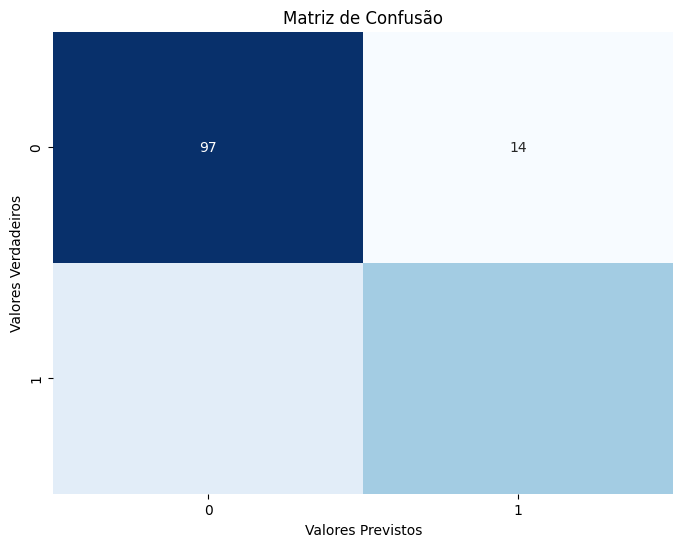

In [239]:

# previsões no conjunto de teste
y_pred = mlp.predict(X_test_scaled)

# cria matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

Prever a sobrevivencia dos passageiros do Titanic a partir do modelo Support Vector Machine

In [240]:
from sklearn.svm import SVC

# features e o target
X = data.drop(['Survived'], axis=1)
y = data['Survived']

# conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pré-processamento e treinamento do modelo SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(kernel='linear', random_state=42))  
])

# treinar o modelo
pipeline.fit(X_train, y_train)

# resultados no conjunto de teste
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

Acurácia do modelo SVM: 0.74


In [241]:
# relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.71      0.54      0.61        67

    accuracy                           0.74       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.74      0.74      0.73       178



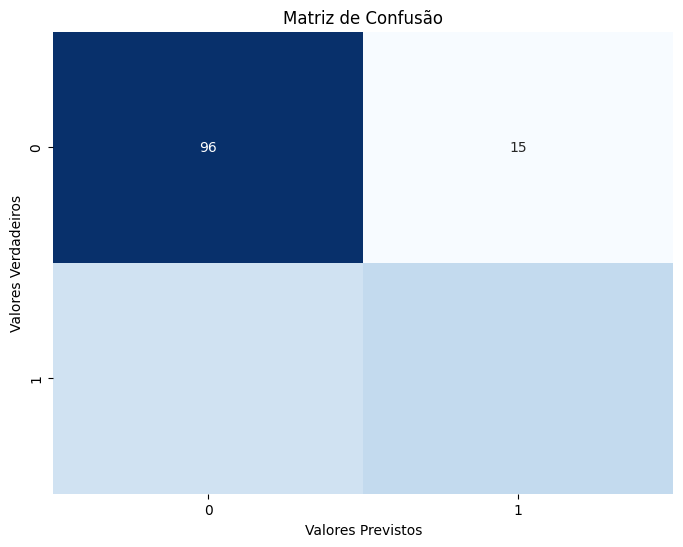

In [242]:
#  matriz de confusão
matriz = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

- Conclusão

A partir de todos os algoritmos testados o modelo Gradient Boosting teve o melhor resultado de acuracia e previsões corretas, ao aplicar a técnica gridSearch para otimizar os hiperparametros, a busca verbosa = 2, obteve um desempenho melhor que 0, de 0,80 para 0,96. O fator que mais influenciou em obtos no titanic foi o grupo, como todos os algoritmos apresentaram. 